In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clo = [[1,1]]
clx = [[1,0],[0,1],[0,0]]

In [3]:
class logistic_model:
    def __init__(self, clo, clx):
        self.train_data = [[1]+x for x in clo + clx]
        self.label_data = [int(x in clo) for x in clo + clx]
        self.input_dim  = len(self.train_data[0])
        self.weights    = np.random.normal(0, 0.1, self.input_dim) #mean 0 std .1 shape = input_data
        
    def forward(self, x):
        out = np.dot(self.weights, x)
        return 1/(1+np.exp(-out))
    
    def loss(self):
        out = 0
        for i, x in enumerate(self.train_data):
            out += -self.label_data[i]*np.log(self.forward(x)) \
                -(1-self.label_data[i])*np.log(1-self.forward(x))
        return out
    
    def test(self):
        ctr = 0 
        for i, x in enumerate(self.train_data):
            if int(self.forward(x)>=0.5)==self.label_data[i]:
                ctr +=1
        print("정확도 : %.2f%%" %(100*ctr/(len(self.train_data))))
        pass

In [4]:
model1 = logistic_model(clo, clx)

In [5]:
model1.loss()

2.7258797435172113

In [6]:
model1.test()

정확도 : 50.00%


In [7]:
class trainer:
    def __init__(self, model, lr):
        self.model = model
        self.lr    = lr
        self.x     = self.model.train_data
        self.y     = self.model.label_data
        self.loss_history = [self.model.loss()]
    
    def grad(self):
        out = np.zeros(self.model.input_dim)
        for i,x in enumerate(self.x):
            out -= (self.y[i]-self.model.forward(x))*np.array(x)
        return out
    
    def train(self, iteration):
        for i in range(iteration):
            self.model.weights -= self.lr * self.grad()
            self.loss_history += [self.model.loss()]
            print("%d-번째 경사하강법 적용시 손실은 %.4f" \
                  %(len(self.loss_history)-1, self.loss_history[-1]))
        plt.plot(self.loss_history, 'r-')
        return plt.show()
    
    

In [8]:
entropy_trainer = trainer(model1, 0.1)

1-번째 경사하강법 적용시 손실은 2.6354
2-번째 경사하강법 적용시 손실은 2.5610
3-번째 경사하강법 적용시 손실은 2.4982
4-번째 경사하강법 적용시 손실은 2.4438
5-번째 경사하강법 적용시 손실은 2.3957
6-번째 경사하강법 적용시 손실은 2.3523
7-번째 경사하강법 적용시 손실은 2.3124
8-번째 경사하강법 적용시 손실은 2.2754
9-번째 경사하강법 적용시 손실은 2.2406
10-번째 경사하강법 적용시 손실은 2.2077
11-번째 경사하강법 적용시 손실은 2.1762
12-번째 경사하강법 적용시 손실은 2.1461
13-번째 경사하강법 적용시 손실은 2.1170
14-번째 경사하강법 적용시 손실은 2.0890
15-번째 경사하강법 적용시 손실은 2.0619
16-번째 경사하강법 적용시 손실은 2.0356
17-번째 경사하강법 적용시 손실은 2.0101
18-번째 경사하강법 적용시 손실은 1.9854
19-번째 경사하강법 적용시 손실은 1.9613
20-번째 경사하강법 적용시 손실은 1.9378
21-번째 경사하강법 적용시 손실은 1.9150
22-번째 경사하강법 적용시 손실은 1.8927
23-번째 경사하강법 적용시 손실은 1.8710
24-번째 경사하강법 적용시 손실은 1.8499
25-번째 경사하강법 적용시 손실은 1.8293
26-번째 경사하강법 적용시 손실은 1.8092
27-번째 경사하강법 적용시 손실은 1.7895
28-번째 경사하강법 적용시 손실은 1.7703
29-번째 경사하강법 적용시 손실은 1.7516
30-번째 경사하강법 적용시 손실은 1.7333
31-번째 경사하강법 적용시 손실은 1.7155
32-번째 경사하강법 적용시 손실은 1.6980
33-번째 경사하강법 적용시 손실은 1.6809
34-번째 경사하강법 적용시 손실은 1.6642
35-번째 경사하강법 적용시 손실은 1.6479
36-번째 경사하강법 적용시 손실은 1.6319
37-번째 경사하강법 적용시 손실은 1.6163
38-번째 경사하강

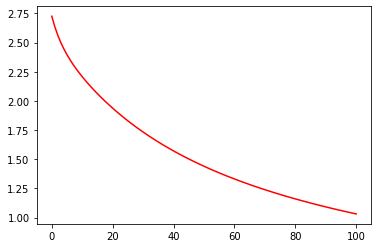

In [9]:
entropy_trainer.train(100)

In [10]:
model1.test()

정확도 : 100.00%


In [11]:
X, Y = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))

In [12]:
Z = [ int(model1.forward(np.array([1,X[i,j], Y[i,j]])) >=0.5) for i in range(100) for j in range(100) ]

In [13]:
Z = np.array(Z)
Z = Z.reshape(100,100)
Z.shape

(100, 100)

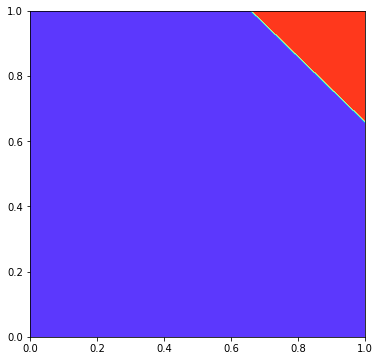

In [14]:
plt.figure(figsize=(6,6))
plt.contourf(X,Y, Z, alpha=1, cmap=plt.cm.rainbow)
plt.show()